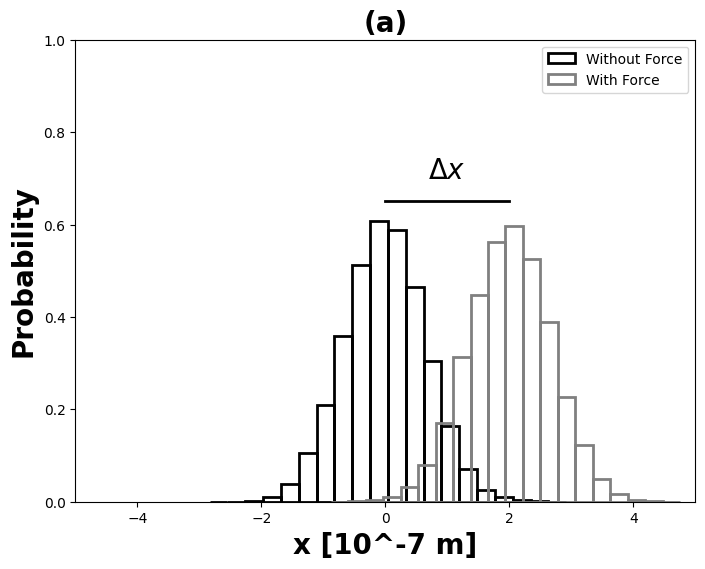

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
from scipy.stats import gaussian_kde
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import gaussian_kde
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import correlate

def trapped(N, Dt, x1, y1, z1, R, T, eta, kx, ky):
    kB = 1.38e-23  # Boltzmann constant [J/K]
    gamma = 6 * np.pi * R * eta  
    D = kB * T / gamma  
    
    np.random.seed(555)
 

    x = np.zeros(N)
    y = np.zeros(N)


    x[0], y[0] = x1, y1  

    for i in range(1, N):
        random = np.random.randn()
        # Deterministic step
        x[i] = x[i - 1] - kx * Dt / gamma *x[i - 1]  
        y[i] = y[i - 1] - ky * Dt / gamma * y[i - 1]


        # Diffusive step
        x[i] += np.sqrt(2 * D * Dt) * random + F * Dt / gamma
        y[i] += np.sqrt(2 * D * Dt) * random
     
        y = -y
    t = np.arange(0, N * Dt, Dt)
    return x, y, t






# Define the parameters
N = 100000
Dt = 1e-3
x1 = y1 = z1 = 0
R = 1e-6
T = 300
eta = 0.001
kx = ky = 1e-6
F = 200e-15 


x, y, t = trapped(N, Dt, x1, y1, z1, R, T, eta, kx, ky)



plt.figure(figsize=(8, 6))

# Plot the histogram of the x positions without the force
plt.hist(y* 10 ** (7), bins=20, density=True, color='black', edgecolor='black', linewidth=2, label='Without Force', fill=False)


# Plot the histogram of the x positions with the force
plt.hist(x * 10 ** (7), bins=20, density=True, color='gray', edgecolor='gray', linewidth=2, label='With Force', fill=False)


plt.xlabel('x [10^-7 m]', fontweight= "bold", fontsize = 20)
plt.ylabel('Probability', fontweight= "bold", fontsize = 20)
plt.legend()
plt.xlim(-5,5)
plt.ylim(0,1)
plt.title('(a)', fontweight= "bold", fontsize = 20)


plt.text(1, 0.7, r'$\Delta x$', fontsize=20, ha='center')

plt.plot([0 , 2 ], [0.65, 0.65], color='k', linestyle='-', linewidth=2)

plt.show()